# Import Library ---

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib import *
import sys
from pylab import *

print('Done!')

Done!


# Load Dataset ---

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Set the file paths (edit when error):

path_train = '/content/drive' + '/MyDrive/Colab Notebooks/DTS PROA MLT2 - 2022/DEMO DAY_FIN 3/train.csv'

path_test = '/content/drive' + '/MyDrive/Colab Notebooks/DTS PROA MLT2 - 2022/DEMO DAY_FIN 3/test.csv'

print(path_train)
print(path_test)

/content/drive/MyDrive/Colab Notebooks/DTS PROA MLT2 - 2022/DEMO DAY_FIN 3/train.csv
/content/drive/MyDrive/Colab Notebooks/DTS PROA MLT2 - 2022/DEMO DAY_FIN 3/test.csv


In [ ]:
# Read the train dataset:

df_train = pd.read_csv(path_train, sep=';')

print(df_train.info(),'\n-------------------')

print('Train dataset shape:',df_train.shape,'\n-------------------')

df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None 
-------------------
Train dataset shape: (45211, 17) 
-------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Read the test dataset:

df_test = pd.read_csv(path_test, sep=';')

print(df_test.info(),'\n-------------------')

print('Testing dataset shape:',df_test.shape,'\n-------------------')

df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None 
-------------------
Testing dataset shape: (4521, 17) 
-------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# EDA & Feature Engineering ---
In this part, some features will be analyzed and transformed to compatible with numpy.array format (Label Encoding, Resamping, etc.)

[PIC : Toto Andriyanto]

In [ ]:
# Split the training & validation dataset:

val_ratio = 0.2
df_train.rename(columns={'y':'buy'}, inplace=True)

X_data = df_train.drop(['buy'], axis=1)
y_data = df_train['buy']

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size= val_ratio, random_state=42)

print('Size of X_Train is {0} and y_train is {1}'.format(X_train.shape, y_train.shape))

print('\nSize of X_validation is {0} and y_validation is {1}'.format(X_val.shape, y_val.shape))

Size of X_Train is (36168, 16) and y_train is (36168,)

Size of X_validation is (9043, 16) and y_validation is (9043,)


### 1. Features Data Type Checking & Rebalancing the Training Dataset

no     31970
yes     4198
Name: buy, dtype: int64


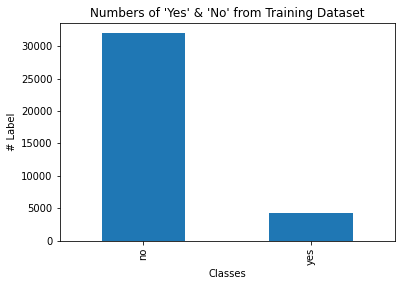

In [ ]:
# Count each labels at training data:

df_train_pure = pd.concat([X_train, y_train], axis=1)
ax = df_train_pure['buy'].value_counts().plot(kind='bar')

ax.set_title("Numbers of 'Yes' & 'No' from Training Dataset")
ax.set_xlabel("Classes")
ax.set_ylabel("# Label")

print(df_train_pure['buy'].value_counts())

We can see **the proportion of 'Yes' and 'No' are imbalanced** (# 'No' is 39,922 while # 'Yes' only 5,289), therefore we need some resampling for 'Yes' data to balance the training dataset. One of methods that can be used to resolved this issue is using ***SMOTE algorithm***.

In [ ]:
# Find the features that have 'categorical' value:

categorical_features = []
categorical_indexes = []

for col_index, col in enumerate(df_train_pure.columns):
  if df_train_pure[col].dtypes == 'O' and col != 'buy':
    categorical_features.append(col)
    categorical_indexes.append(col_index)

print(categorical_features)
print(categorical_indexes)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
[1, 2, 3, 4, 6, 7, 8, 10, 15]


In [ ]:
# Import SMOTE and do rebalancing for 'Yes' data:

is_rebalance = False  # Set this parameter to 'True' for rebalance the dataset

if is_rebalance:
  import imblearn
  from imblearn.over_sampling import SMOTENC  # Using Oversampling methods for rebalancing data

  smote = SMOTENC(categorical_features= np.array(categorical_indexes), random_state = 42)

  X_train_ori = df_train_pure.drop(['buy'], axis=1)
  y_train_ori = df_train_pure['buy']
  y_train_ori.replace({'yes':1, 'no':0}, inplace=True)

  print("Before resampling, counts of label 'yes': {0} and label 'no': {1}".format(sum(y_train_ori == 1), sum(y_train_ori == 0)))

  X_train_res, y_train_res = smote.fit_resample(X_train_ori, y_train_ori.ravel())

  print('After OverSampling, the shape of X_train: {0} and y_train {1}'.format(X_train_res.shape, y_train_res.shape))
    
  print("Therefore, the counts of label 'yes': {0} and label 'no': {1}".format(sum(y_train_res == 1), sum(y_train_res == 0)))

else:
  X_train_res = df_train_pure.drop(['buy'], axis=1)
  y_train_res = df_train_pure['buy']
  y_train_res.replace({'yes':1, 'no':0}, inplace=True)

  print("No resampling is executed, so the counts of label 'yes': {0} and counts of label 'no': {1}".format(sum(y_train_res == 1), sum(y_train_res == 0)))

No resampling is executed, so the counts of label 'yes': 4198 and counts of label 'no': 31970


In [ ]:
# Rearrange the training dataset to see the results:

df_train_res = X_train_res.copy() 
df_train_res['buy'] = y_train_res

print("The new resampled/current training dataset's shape is", df_train_res.shape)

df_train_res.head(10)

The new resampled/current training dataset's shape is (36168, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,buy
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,15,may,72,1,-1,0,unknown,0
17965,49,technician,married,primary,no,1415,yes,no,cellular,30,jul,269,2,-1,0,unknown,0
18299,42,admin.,married,secondary,no,3842,no,no,cellular,31,jul,130,4,-1,0,unknown,0
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,jun,375,11,-1,0,unknown,0
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,15,apr,264,2,-1,0,unknown,1
23098,39,technician,single,secondary,no,3867,no,no,cellular,26,aug,257,12,-1,0,unknown,0
6633,30,management,single,tertiary,no,849,yes,no,unknown,28,may,261,6,-1,0,unknown,0
313,37,services,divorced,secondary,no,398,yes,yes,unknown,5,may,214,2,-1,0,unknown,0
12525,26,services,married,secondary,no,549,no,no,unknown,3,jul,149,1,-1,0,unknown,0
44313,55,technician,married,tertiary,no,1320,no,no,cellular,28,jul,340,1,91,2,success,1


### 2. Label Encoding & Feature Transformations

In [ ]:
# Label Encoding for training dataset

label_list = []

df_train_encoded = df_train_res.copy()

for col in categorical_features:
  label_data = df_train_res[col].value_counts().reset_index().reset_index().sort_values([col], ascending=False).drop([col], axis=1)
  label_data.rename(columns={'level_0':'label', 'index':col}, inplace=True)
  label_data['label'] = label_data['label'] + 1
  label_dictionary = label_data.set_index(col).to_dict()['label']

  label_list.append([col, label_dictionary])
  df_train_encoded[col] = df_train_encoded[col].replace(label_dictionary)
  print('Feature {} successfully encoded!'.format(col))

df_train_encoded.head()

Feature job successfully encoded!
Feature marital successfully encoded!
Feature education successfully encoded!
Feature default successfully encoded!
Feature housing successfully encoded!
Feature loan successfully encoded!
Feature contact successfully encoded!
Feature month successfully encoded!
Feature poutcome successfully encoded!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,buy
3344,41,1,1,3,1,849,1,1,2,15,1,72,1,-1,0,1,0
17965,49,3,1,3,1,1415,1,1,1,30,2,269,2,-1,0,1,0
18299,42,4,1,1,1,3842,2,1,1,31,2,130,4,-1,0,1,0
10221,37,2,2,2,1,-119,1,1,2,11,4,375,11,-1,0,1,0
32192,56,1,1,3,1,3498,2,1,1,15,6,264,2,-1,0,1,1


In [ ]:
# Feature scaling for non-categorical values:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train_non_categorical = df_train_encoded.loc[:, ~df_train_encoded.columns.isin(categorical_features + ['buy'])]

scaler.fit(df_train_non_categorical)
df_train_scaled = scaler.fit_transform(df_train_non_categorical)
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train_non_categorical.columns)

df_train_ready = pd.concat([df_train_scaled, df_train_encoded.loc[:, df_train_encoded.columns.isin(categorical_features + ['buy'])].reset_index().drop(['index'],axis=1)], axis=1)

print('The shape of proccesed training data is:', df_train_ready.shape)
df_train_ready.head()

The shape of proccesed training data is: (36168, 17)


,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,buy
0,0.006515,-0.169381,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,1,1,3,1,1,1,2,1,1,0
1,0.759937,0.017848,1.703422,0.047138,-0.245389,-0.411364,-0.244772,3,1,3,1,1,1,1,2,1,0
2,0.100693,0.820681,1.823532,-0.493970,0.395606,-0.411364,-0.244772,4,1,1,1,2,1,1,2,1,0
3,-0.370196,-0.489588,-0.578656,0.459781,2.639088,-0.411364,-0.244772,2,2,2,1,1,1,2,4,1,0
4,1.419181,0.706889,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,1,1,3,1,2,1,1,6,1,1


In [ ]:
# Repeat the process for validation dataset:

df_val_encoded = pd.concat([X_val, y_val], axis=1)

for col in categorical_features:
  for dictionaries in label_list:
    if col == dictionaries[0]:
      df_val_encoded[col] = df_val_encoded[col].replace(dictionaries[1])

df_val_encoded['buy'].replace({'yes':1, 'no':0}, inplace=True)

# Feature scaling for non-categorical values:

df_val_non_categorical = df_val_encoded.loc[:, ~df_val_encoded.columns.isin(categorical_features + ['buy'])]

df_val_scaled = scaler.fit_transform(df_val_non_categorical)
df_val_scaled = pd.DataFrame(df_val_scaled, columns=df_val_non_categorical.columns)

df_val_ready = pd.concat([df_val_scaled, df_val_encoded.loc[:, df_val_encoded.columns.isin(categorical_features + ['buy'])].reset_index().drop(['index'],axis=1)], axis=1)

print('The shape of proccesed validation data is:', df_val_ready.shape)

df_val_ready.head()

The shape of proccesed validation data is: (9043, 17)


,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,buy
0,-0.090182,-0.251495,0.028748,-0.274013,-0.584037,-0.411810,-0.288514,1,1,1,1,1,1,2,1,1,0
1,0.568933,0.727425,-0.813735,-0.693205,-0.251557,-0.411810,-0.288514,5,2,1,1,2,1,2,4,1,0
2,-1.502571,-0.264914,0.510167,-0.143256,-0.584037,-0.411810,-0.288514,11,2,2,1,1,1,1,6,1,0
3,0.098137,0.129657,-0.813735,0.183637,-0.584037,2.951021,0.208445,2,1,2,1,2,1,1,6,2,0
4,1.416366,-0.367471,0.630521,-0.547065,-0.251557,-0.411810,-0.288514,2,1,2,1,2,2,1,2,1,0


# Modelling Process ---

In this part, model architecture will be created and trained with ready training dataset. The used model in this project is ANN with Sequential Dense.

[PIC : Kevin Nugraha Salim]

In [ ]:
# Split the training & validation dataset for training the model:

X_train_ready = df_train_ready.drop(['buy'], axis=1)
y_train_ready = df_train_ready['buy']
 
X_val_ready = df_val_ready.drop(['buy'], axis=1)
y_val_ready = df_val_ready['buy']

print('Size of X_Train is {0} and y_train is {1}'.format(X_train_ready.shape, y_train_ready.shape))

print('\nSize of X_validation is {0} and y_validation is {1}'.format(X_val_ready.shape, y_val_ready.shape))

Size of X_Train is (36168, 16) and y_train is (36168,)

Size of X_validation is (9043, 16) and y_validation is (9043,)


In [ ]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(64, activation = 'relu', input_dim = X_train_ready.shape[1]))
# Adding the second hidden layer
model.add(Dense(128, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(32, activation = 'relu'))
# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

# Source: https://analyticsindiamag.com/deep-learning-model-bank-crisis-prediction-deep-neural-network/

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the ANN

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['Precision', 'accuracy', 'Recall'])

In [ ]:
#Fitting the model

history = model.fit(X_train_ready, y_train_ready, validation_data = (X_val_ready, y_val_ready), epochs=200)

Epoch 1/200
1131/1131 [==============================] - 5s 3ms/step - loss: 0.2522 - precision: 0.5762 - accuracy: 0.8932 - recall: 0.3035 - val_loss: 0.2380 - val_precision: 0.5939 - val_accuracy: 0.8949 - val_recall: 0.4088
Epoch 2/200
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2326 - precision: 0.6075 - accuracy: 0.8995 - recall: 0.3783 - val_loss: 0.2393 - val_precision: 0.6173 - val_accuracy: 0.8932 - val_recall: 0.3016
Epoch 3/200
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2259 - precision: 0.6221 - accuracy: 0.9012 - recall: 0.3792 - val_loss: 0.2346 - val_precision: 0.6565 - val_accuracy: 0.8952 - val_recall: 0.2750
Epoch 4/200
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2241 - precision: 0.6202 - accuracy: 0.9012 - recall: 0.3835 - val_loss: 0.2367 - val_precision: 0.6438 - val_accuracy: 0.8946 - val_recall: 0.2832
Epoch 5/200
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2218 - precis

In [ ]:
scores = model.evaluate(X_train_ready, y_train_ready)
print ("Training Accuracy: %.2f%%\n" % (scores[2]*100))
scores = model.evaluate(X_val_ready, y_val_ready)
print ("Testing Accuracy: %.2f%%\n" % (scores[2]*100))

1131/1131 [==============================] - 2s 2ms/step - loss: 0.0428 - precision: 0.9468 - accuracy: 0.9847 - recall: 0.9202
Training Accuracy: 98.47%

283/283 [==============================] - 0s 2ms/step - loss: 1.2002 - precision: 0.5149 - accuracy: 0.8823 - recall: 0.4290
Testing Accuracy: 88.23%



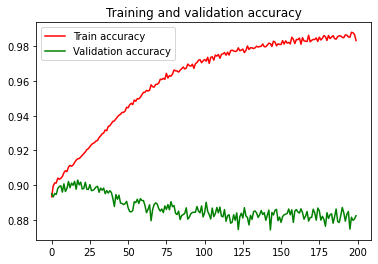

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Accruracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],'r', label='Train accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

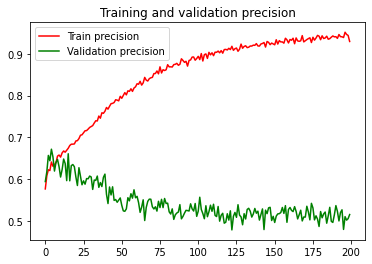

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Precision
import matplotlib.pyplot as plt

plt.plot(history.history['precision'],'r', label='Train precision')
plt.plot(history.history['val_precision'], 'g', label='Validation precision')
plt.title('Training and validation precision')
plt.legend(loc=0)
plt.figure()
plt.show()

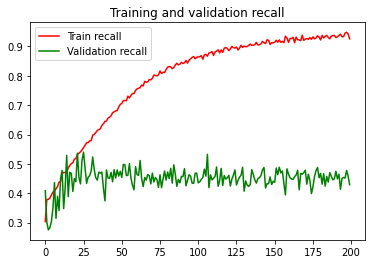

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Recall
import matplotlib.pyplot as plt

plt.plot(history.history['recall'],'r', label='Train recall')
plt.plot(history.history['val_recall'], 'g', label='Validation recall')
plt.title('Training and validation recall')
plt.legend(loc=0)
plt.figure()
plt.show()

# Testing the Test Dataset ---

After the model successfully trained, the model will be used to predict testing dataset

[PIC : Kevin Nugraha Salim & Kurnia Aditia]

In [ ]:
# Apply feature transformations (Label encoding & Scaling) to testing dataset:
# Use the same parameters with training model...

df_test_encoded = df_test.copy()

for col in categorical_features:
  for dictionaries in label_list:
    if col == dictionaries[0]:
      df_test_encoded[col] = df_test_encoded[col].replace(dictionaries[1])

df_test_encoded['y'].replace({'yes':1, 'no':0}, inplace=True)
df_test_encoded.rename(columns={'y':'buy'}, inplace=True)

# Feature scaling for non-categorical values:

df_test_non_categorical = df_test_encoded.loc[:, ~df_test_encoded.columns.isin(categorical_features + ['buy'])]

df_test_scaled = scaler.fit_transform(df_test_non_categorical)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test_non_categorical.columns)

df_test_ready = pd.concat([df_test_scaled, df_test_encoded.loc[:, df_test_encoded.columns.isin(categorical_features + ['buy'])]], axis=1)

print('The shape of proccesed testing data is:', df_test_ready.shape)
df_test_ready.head()

The shape of proccesed testing data is: (4521, 17)


,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,buy
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,9,1,3,1,2,1,1,9,1,0
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,5,1,1,1,1,2,1,1,2,0
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,2,2,2,1,1,1,1,6,2,0
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,2,1,2,1,1,2,2,4,1,0
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,1,1,1,1,1,1,2,1,1,0


In [ ]:
# Split the X_test & y_test dataset and predict using :

threshold = 0.5  # Set the threshold (default = 0.5)

X_test = df_test_ready.drop(['buy'], axis=1)
y_test = df_test_ready['buy']

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > threshold, 1,0)

print(y_pred[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


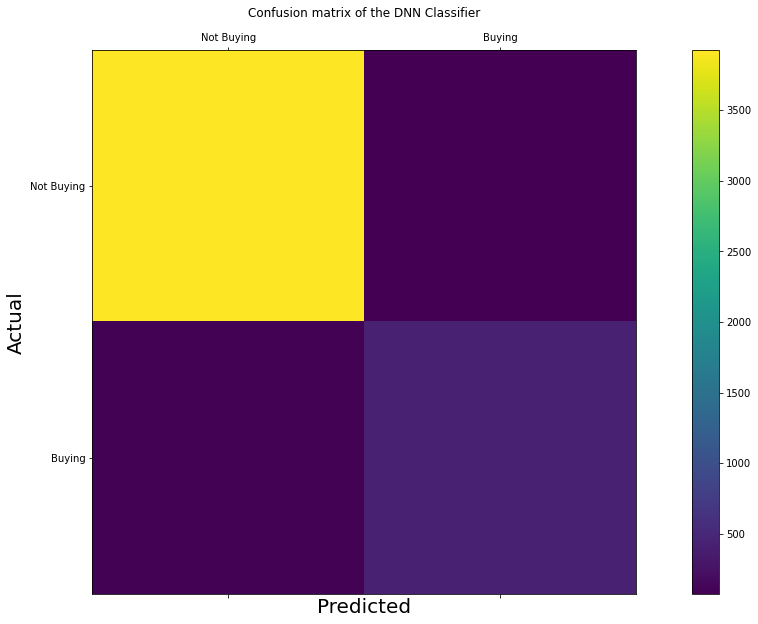

[[3924   76]
 [  98  423]]


In [ ]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Buying', 'Buying']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the DNN Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', size=20)
plt.ylabel('Actual', size=20)
plt.show()

print(cm)

In [ ]:
# Make the classification report

from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4000
           1       0.85      0.81      0.83       521

    accuracy                           0.96      4521
   macro avg       0.91      0.90      0.90      4521
weighted avg       0.96      0.96      0.96      4521



# Exploring more on Features ---

We will dive more into the data features based on prediction results from testing dataset. One of the method that we used is Feature Importance. This part will result some of customer's segmentation that will BUY the deposit product.

[PIC : Kurnia Aditia]

<BarContainer object of 16 artists>

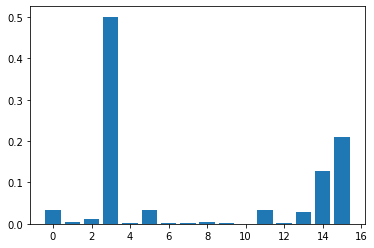

In [ ]:
# Determine the feature importances using GradientBoostingReggresor

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train_ready, y_train_ready.values.ravel())

plt.bar(range(X_train_ready.shape[1]), gb.feature_importances_)

In [ ]:
# Use filter selection method

features_values = []

for i, j in enumerate(gb.feature_importances_):
  features_values.append([i,j])

for i, j in enumerate(X_train_ready.columns):
  print("Feature {0} : {2} - [{1}]".format(i, j, features_values[i][1]))

Feature 0 : 0.032453212468850724 - [age]
Feature 1 : 0.005532398314604699 - [balance]
Feature 2 : 0.012619601671049472 - [day]
Feature 3 : 0.5005597531443011 - [duration]
Feature 4 : 0.002422589927646787 - [campaign]
Feature 5 : 0.03335552193634615 - [pdays]
Feature 6 : 0.001437269657437001 - [previous]
Feature 7 : 0.0014013176804340477 - [job]
Feature 8 : 0.00424687873769471 - [marital]
Feature 9 : 0.0018707851299879328 - [education]
Feature 10 : 0.0 - [default]
Feature 11 : 0.03404638807395008 - [housing]
Feature 12 : 0.001970341134689204 - [loan]
Feature 13 : 0.028619056525018685 - [contact]
Feature 14 : 0.12859914574177325 - [month]
Feature 15 : 0.2108657398562163 - [poutcome]


In [ ]:
feature_df = pd.DataFrame(features_values, columns=['Feature Number', 'Importance Value'])

feature_df['Importance Value (%)'] = feature_df.apply(lambda x: x['Importance Value']*100, axis=1)
feature_df.sort_values(by=['Importance Value (%)'], ascending=True, inplace=True)

feature_df['Cumulative Sum'] = feature_df['Importance Value (%)'].cumsum()

features_dict = {
    0:'age',
    1:'balance',
    2:'day',
    3:'duration',
    4:'campaign',
    5:'pdays',
    6:'previous',
    7:'job',
    8:'marital',
    9:'education',
    10:'default',
    11:'housing',
    12:'loan',
    13:'contact',
    14:'month',
    15:'poutcome'
}

feature_df['Feature'] = feature_df['Feature Number'].replace(features_dict)

feature_df

,Feature Number,Importance Value,Importance Value (%),Cumulative Sum,Feature
10,10,0.000000,0.000000,0.000000,default
7,7,0.001401,0.140132,0.140132,job
6,6,0.001437,0.143727,0.283859,previous
9,9,0.001871,0.187079,0.470937,education
12,12,0.001970,0.197034,0.667971,loan
4,4,0.002423,0.242259,0.910230,campaign
8,8,0.004247,0.424688,1.334918,marital
1,1,0.005532,0.553240,1.888158,balance
2,2,0.012620,1.261960,3.150118,day
13,13,0.028619,2.861906,6.012024,contact


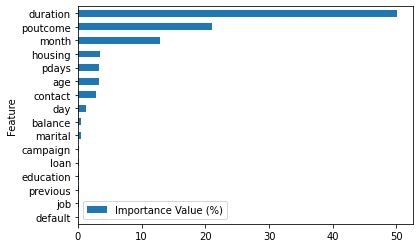

In [ ]:
feature_df.plot.barh(x='Feature', y='Importance Value (%)')

In [ ]:
feature_df[['Feature', 'Importance Value (%)']].sort_values(by='Importance Value (%)', ascending=False)

,Feature,Importance Value (%)
3,duration,50.055975
15,poutcome,21.086574
14,month,12.859915
11,housing,3.404639
5,pdays,3.335552
0,age,3.245321
13,contact,2.861906
2,day,1.261960
1,balance,0.553240
8,marital,0.424688


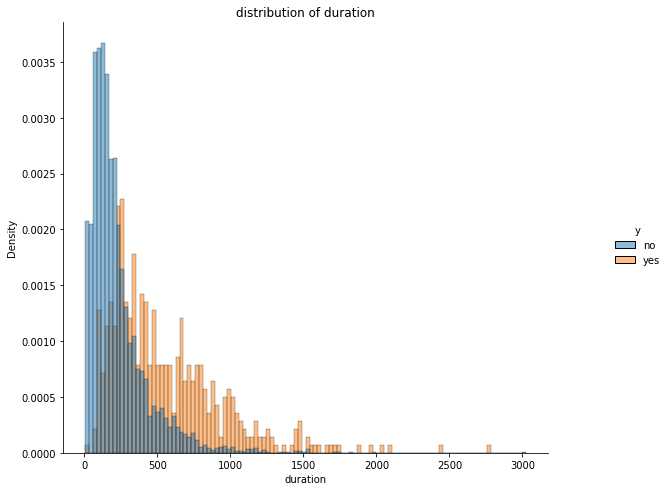

<Figure size 432x288 with 0 Axes>

In [ ]:
# explore duration
sns.displot(data = df_test, 
            x = 'duration', 
            hue = 'y',
            stat="density", common_norm=False)
plt.gcf().set_size_inches(10, 7)
plt.title('distribution of duration')
plt.show()
plt.clf()

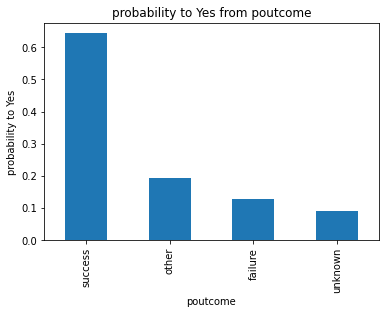

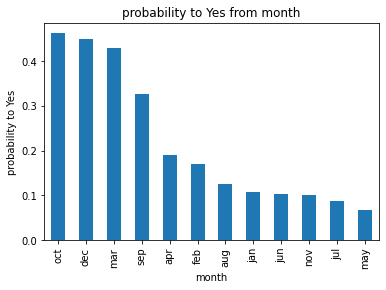

In [ ]:
# wxplore poutcome & month by the probibility to Yes
for c in ['poutcome', 'month']:
  df_test.assign(y=(df_test['y']=='yes').astype('int')).\
  groupby(c)['y'].mean().sort_values(ascending=False).\
  plot(kind = 'bar', title = 'probability to Yes from '+c)
  plt.ylabel('probability to Yes')
  plt.show()